In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
nb_classes = 10

# 28x28크기의 이미지 => 28x28 = 784
X = tf.placeholder(tf.float32 , shape=[None , 784])

# 0~9 digist -> 10개의 class
Y = tf.placeholder(tf.float32 , shape=[None , nb_classes])

In [21]:
mnist = input_data.read_data_sets("MNIST_data/" , one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [22]:
#Test model
is_correct = tf.equal(tf.arg_max(hypothesis,1) , tf.arg_max(Y,1))

#Calculate Accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct , tf.float32))

Instructions for updating:
Use `tf.math.argmax` instead


In [16]:
#초기값을 xavier로 최적의 W값을 선택해줌

#1번째 Layer
W1 = tf.get_variable("W" , shape=[784,256] , initializer = tf.contrib.layers.xavier_initializer())
b1 = tf.Variable(tf.random_normal([256]))
L1 = tf.nn.relu(tf.matmul(X,W1)+b1)

#2번째 Layer
W2 = tf.get_variable("W2" , shape=[256,256] , initializer = tf.contrib.layers.xavier_initializer())
b2 = tf.Variable(tf.random_normal([256]))
L2 = tf.nn.relu(tf.matmul(L1,W2) + b2) 

W3 = tf.get_variable("W3" , shape=[256,10] , initializer = tf.contrib.layers.xavier_initializer())
b3 = tf.Variable(tf.random_normal([10]))

In [17]:
hypothesis = tf.matmul(L2,W3) + b3

In [18]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = hypothesis, labels = Y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [19]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.01)

In [20]:
train = optimizer.minimize(cost)

Epoch : 0001 cost =  0.260698174
Epoch : 0002 cost =  0.137237620
Epoch : 0003 cost =  0.112707728
Epoch : 0004 cost =  0.100616064
Epoch : 0005 cost =  0.096694650
Epoch : 0006 cost =  0.088637940
Epoch : 0007 cost =  0.086012935
Epoch : 0008 cost =  0.076763303
Epoch : 0009 cost =  0.092049374
Epoch : 0010 cost =  0.065775803
Epoch : 0011 cost =  0.064907266
Epoch : 0012 cost =  0.072000759
Epoch : 0013 cost =  0.067174370
Epoch : 0014 cost =  0.057252584
Epoch : 0015 cost =  0.062975130
Learning Finished
Accuracy :  0.9693
2690
Label :  [3]
Prediction :  [3]


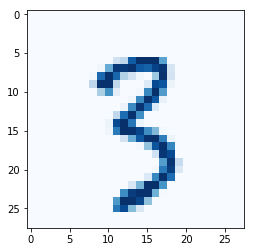

In [23]:
# epoch = 전체 데이터를 몇번씩 학습시킬지
training_epochs = 15

#size만큼의 traindata를 가져와서 학습을 시킴
batch_size = 100


with tf.Session() as sess :
    sess.run(tf.global_variables_initializer())
    
    for epochs in range(training_epochs) :
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch) :
            batch_xs , batch_ys = mnist.train.next_batch(batch_size)
            c , _ = sess.run([cost , train] , feed_dict = { X : batch_xs, Y : batch_ys})
            avg_cost += c  / total_batch
        print('Epoch :' , '%04d' % (epochs +1 ) , 'cost = ', '{:.9f}'.format(avg_cost) )     
    
    print("Learning Finished")
   #Test the model using test sets
    print("Accuracy : ", accuracy.eval(session=sess , feed_dict={X : mnist.test.images , Y : mnist.test.labels}))     
    
    #mnist.test의 예제 중 하나를 랜덤으로 읽음
    r = random.randint(0, mnist.test.num_examples -1)
    print(r)
    print("Label : " , sess.run(tf.arg_max(mnist.test.labels[r:r+1] , 1)))  # mnist.test.labels리스트가 one_hot 이기에 arg_max를 이용
    print("Prediction : ", sess.run(tf.arg_max(hypothesis,1), feed_dict={X : mnist.test.images[r:r+1]} ))
    plt.imshow(mnist.test.images[r:r+1].reshape(28,28) , cmap = 'Blues' , interpolation ='nearest')
    plt.show()